In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Chargement et construction du graphe biparti utilisateur-produit

In [ ]:
rating_path = "../Data/Ciao/Dataset/rating.txt"

# Lecture ligne par ligne en splitant proprement
data = []
with open(rating_path, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("::::")
        if len(parts) >= 4:
            try:
                user = parts[0]
                product = parts[1]
                rating = float(parts[3])  # On prend le 4e champ (index 3)
                data.append((user, product, rating))
            except ValueError:
                continue  # Ignorer les lignes corrompues

# Création du DataFrame
ratings = pd.DataFrame(data, columns=["UserID", "ProductID", "Rating"])

print("Données chargées avec succès :", ratings.shape)
print(ratings.head())

# Création du graphe biparti utilisateur-produit
B = nx.Graph()

# Récupération des utilisateurs et produits
users = ratings['UserID'].unique()
products = ratings['ProductID'].unique()

# Ajout des nœuds dans le graphe avec l'attribut bipartite
B.add_nodes_from(users, bipartite='users')
B.add_nodes_from(products, bipartite='products')

# Ajout des arêtes utilisateur-produit avec la note en attribut
for index, row in ratings.iterrows():
    B.add_edge(row["UserID"], row["ProductID"], rating=row["Rating"])


Données chargées avec succès : (304498, 3)
    UserID                          ProductID  Rating
0  5247778               Pyrex Oblong Roaster    40.0
1  5247778                   Nozeroy (France)    40.0
2  5247778               Tesco Red UK Cabbage    40.0
3  5247778             Chesil Beach, Weymouth    40.0
4  5247778  Mackays Seedless Bramble Preserve    40.0


In [12]:
ratings

,UserID,ProductID,Rating
0,5247778,Pyrex Oblong Roaster,40.0
1,5247778,Nozeroy (France),40.0
2,5247778,Tesco Red UK Cabbage,40.0
3,5247778,"Chesil Beach, Weymouth",40.0
4,5247778,Mackays Seedless Bramble Preserve,40.0
...,...,...,...
304493,5012545,Nokia 402,10.0
304494,5012545,Peugeot 106 1.1,50.0
304495,5016902,Popstars,50.0
304496,5016902,Miss Selfridge (Shop),50.0


Utilisateurs sélectionnés : ['5788163', '5274064', '5474620', '5377808', '5017925', '6699280', '6505604', '5013628', '5312258', '5477485']
Produits sélectionnés : ['All About Me', 'Garnier Ambre Solaire', 'Toast Deluxe 4', 'Does true love really exist?', 'NetScreen 50f', 'Romeo And Juliet (+CD) (DVD)', 'Wilkinsons (Shop)', 'James Herbert', 'A Day In The Life Of....', 'Sega Dreamcast']


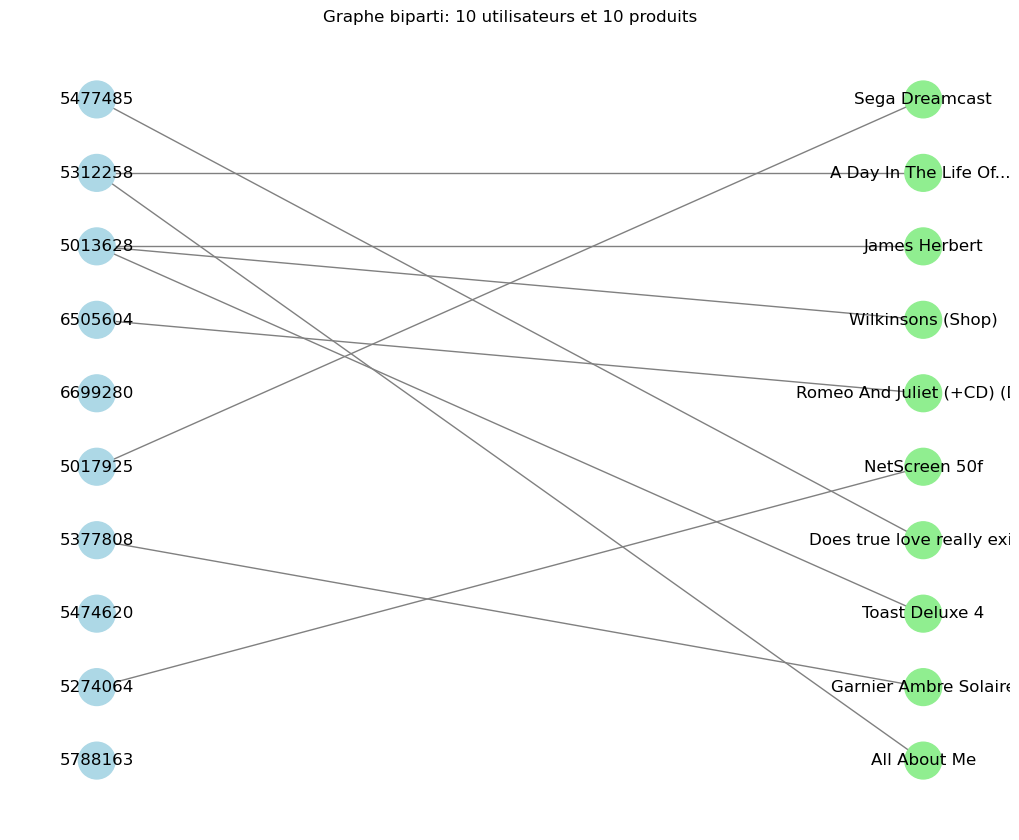

In [ ]:
# 1. Sélectionner 10 utilisateurs aléatoires
unique_users = ratings['UserID'].unique()
selected_users = random.sample(list(unique_users), 10)
print("Utilisateurs sélectionnés :", selected_users)

# 2. Pour ces 10 utilisateurs, recueillir tous les produits qu'ils ont évalués
user_ratings = ratings[ratings['UserID'].isin(selected_users)]
all_products = user_ratings['ProductID'].unique()

# S'assurer de sélectionner 10 produits distincts ; s'il y en a plus, on en choisit 10 au hasard
if len(all_products) < 10:
    print("Attention : moins de 10 produits distincts ont été trouvés pour ces utilisateurs.")
    selected_products = list(all_products)
else:
    selected_products = random.sample(list(all_products), 10)
print("Produits sélectionnés :", selected_products)

# 3. Construire le graphe biparti avec ces utilisateurs et produits
B = nx.Graph()

# Ajout des utilisateurs
B.add_nodes_from(selected_users, bipartite='users')
# Ajout des produits
B.add_nodes_from(selected_products, bipartite='products')

# Ajout des arêtes : ne garder que les interactions où l'utilisateur et le produit sont dans nos listes sélectionnées
subset = user_ratings[user_ratings['ProductID'].isin(selected_products)]

for _, row in subset.iterrows():
    # On peut ajouter la note en attribut de l'arête
    B.add_edge(row["UserID"], row["ProductID"], rating=row["Rating"])

# 4. Visualiser le graphe biparti
plt.figure(figsize=(10, 8))

# Positionnement en utilisant la disposition bipartite : les utilisateurs à gauche, les produits à droite.
pos = nx.bipartite_layout(B, selected_users)
# Couleurs : utilisateurs en bleu, produits en vert.
node_colors = ["lightblue" if node in selected_users else "lightgreen" for node in B.nodes()]
nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=700)
plt.title("Graphe biparti: 10 utilisateurs et 10 produits")
plt.show()

# Chargement et construction du graphe social

In [34]:
# Chemin vers le fichier trustnetwork
trustnetwork_path = "../Data/Ciao/Dataset/trustnetwork.txt"

# Lecture du fichier trustnetwork avec le séparateur "::::"
trust_edges = []
with open(trustnetwork_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue  # ignorer les lignes vides
        # Séparer les utilisateurs avec "::::"
        users = line.split("::::")
        u, v, _ = users
        trust_edges.append((u.strip(), v.strip()))

print("Nombre total d'arêtes dans le réseau de confiance :", len(trust_edges))

# Création d'un graphe dirigé pour représenter les relations de confiance
G_social = nx.DiGraph()
G_social.add_edges_from(trust_edges)

Nombre total d'arêtes dans le réseau de confiance : 145826


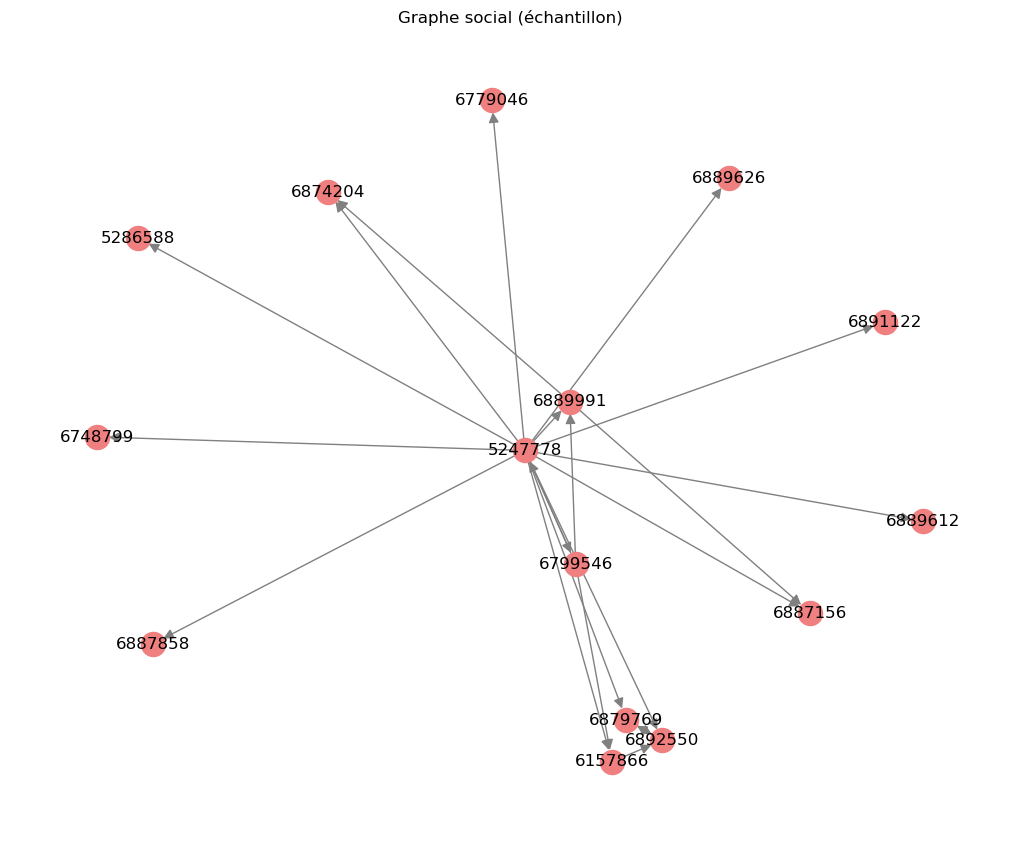

In [35]:
# Pour visualiser, on extrait un sous-graphe (par exemple les 50 premiers nœuds)
nodes_sample = list(G_social.nodes())[:15]
G_social_sub = G_social.subgraph(nodes_sample)

# Visualisation avec une mise en page de type spring_layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_social_sub, seed=42)
nx.draw(G_social_sub, pos, with_labels=True, node_color="lightcoral", edge_color="gray", arrows=True, arrowsize=15)
plt.title("Graphe social (échantillon)")
plt.show()